In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal
from matplotlib import cm

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

from sklearn.metrics import adjusted_mutual_info_score

plt.style.use('default')
sns.set_style("whitegrid")

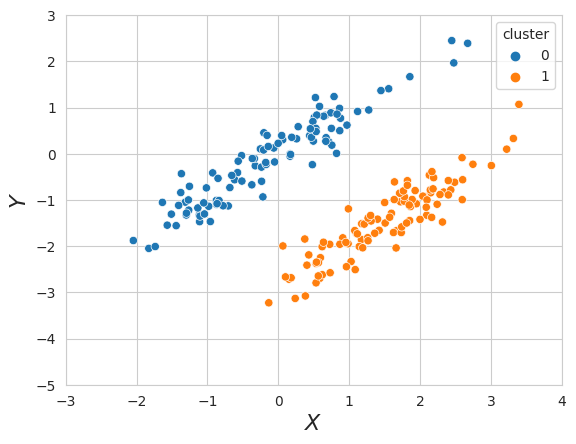

In [2]:
mean_1=[0,0]
cov_1=[[1, 0.95],[0.95, 1]]
x = multivariate_normal.rvs(mean=mean_1, cov=cov_1, size=100)
data_cigars_1 = pd.DataFrame( {'x': x[:,0], 'y': x[:,1], 'cluster': [0]*100 })

mean_2=[1.5,-1.5]
cov_2=[[1, 0.95],[0.95, 1]]
x = multivariate_normal.rvs(mean=mean_2, cov=cov_2, size=100)
data_cigars_2 = pd.DataFrame( {'x': x[:,0], 'y': x[:,1], 'cluster': [1]*100 })

data_cigars = data_cigars_1.append(data_cigars_2)

sns.scatterplot(x='x', y='y', data=data_cigars, hue='cluster')
plt.xlim(-3, 4)
plt.ylim(-5, 3)
plt.xlabel(r'$X$', fontsize=16)
plt.ylabel(r'$Y$', fontsize=16);

In [3]:
def gaussian_mixture_proba(pos_for_pdf, mu, cov, pi):
    s = 0
    k = len(mu)
    for j in range(k):
        s += pi[j] * multivariate_normal.pdf(pos_for_pdf, mu[j], cov[j]) 
    return s

In [4]:
mu = np.array([mean_1, mean_2])
cov = np.array([np.array(cov_1), np.array(cov_2)])
pi = np.array([0.5, 0.5])

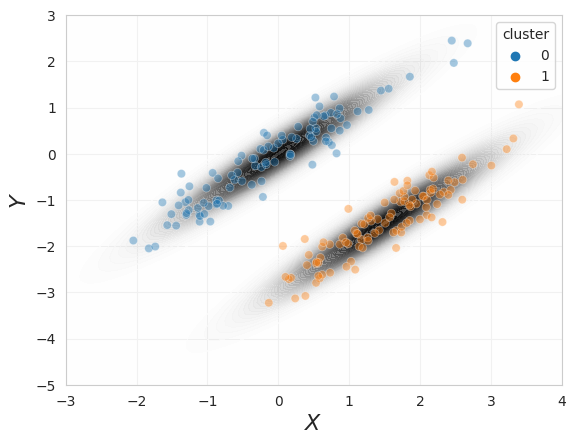

In [5]:
fig, ax = plt.subplots(1,1)
x = np.linspace(-3,4,100)
y = np.linspace(-5,3,100)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
ax.contourf(X, Y, gaussian_mixture_proba(pos, mu=mu, cov=cov, pi=pi), 50, cmap=cm.Greys, alpha=0.75)
sns.scatterplot(x='x', y='y', data=data_cigars, hue='cluster', alpha=0.4)
plt.xlim(-3, 4)
plt.ylim(-5, 3)
plt.ylabel(r'$Y$', fontsize=16)
plt.xlabel(r'$X$', fontsize=16);

Text(0, 0.5, '$Y$')

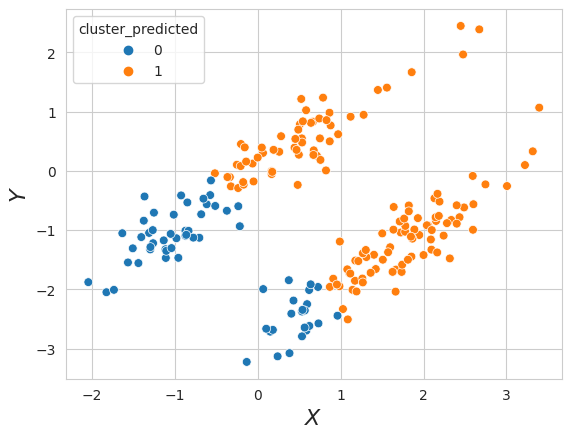

In [6]:
model = GaussianMixture(n_components=2, covariance_type='full')
model.fit(data_cigars[['x', 'y']])
data_cigars['cluster_predicted'] = model.predict(data_cigars[['x', 'y']])
plt.clf()
sns.scatterplot(x='x', y='y', s=40, hue='cluster_predicted', data=data_cigars)
plt.xlabel(r'$X$', fontsize=16)
plt.ylabel(r'$Y$', fontsize=16)